In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np
from scipy.stats import norm # for scientific Computing
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
titanic=sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Data understanding if data missing 50% drop it

In [7]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

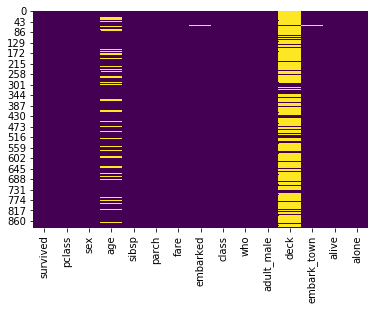

In [8]:
sns.heatmap(titanic.isnull(), cbar=False,cmap='viridis')#another way to check missing value

In [9]:
titanic['age'].isnull().sum()/titanic.shape[0]*100

19.865319865319865

<function matplotlib.pyplot.show(*args, **kw)>

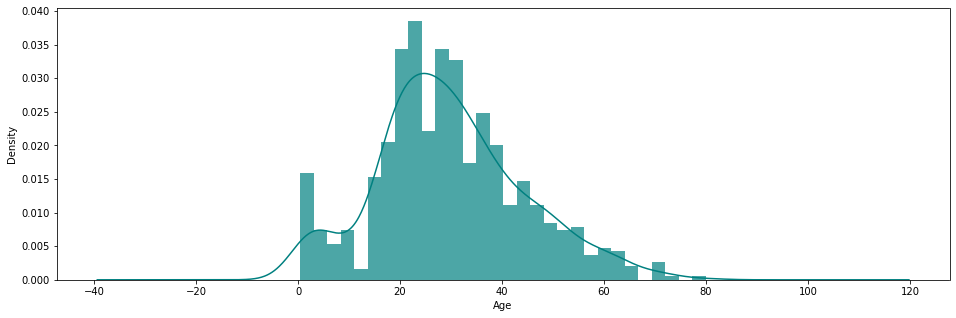

In [10]:
ax = titanic['age'].hist(bins=30,density=True, stacked=True, color='teal',alpha=0.7, figsize=(16,5))
titanic['age'].plot(kind='density',color='teal')
ax.set_xlabel('Age')
plt.show

Text(0.5, 1.0, 'Male')

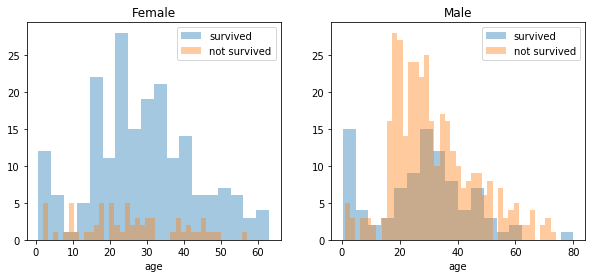

In [11]:
survived='survived'
not_survived='not survived'
fig,axes=plt.subplots(nrows=1,ncols=2, figsize=(10,4))
women=titanic[titanic['sex']=='female']
men=titanic[titanic['sex']=='male']
ax=sns.distplot(women[women[survived]==1].age.dropna(),bins=18,label=survived,ax=axes[0],kde=False)
ax=sns.distplot(women[women[survived]==0].age.dropna(),bins=40,label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')
ax=sns.distplot(men[men[survived]==1].age.dropna(),bins=18,label=survived,ax=axes[1],kde=False)
ax=sns.distplot(men[men[survived]==0].age.dropna(),bins=40,label=not_survived,ax=axes[1],kde=False)
ax.legend()
ax.set_title('Male')

In [12]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

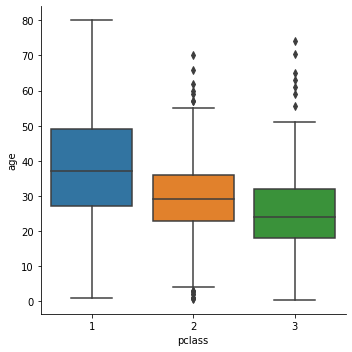

In [13]:
sns.catplot(x='pclass',y='age',data=titanic, kind ='box')

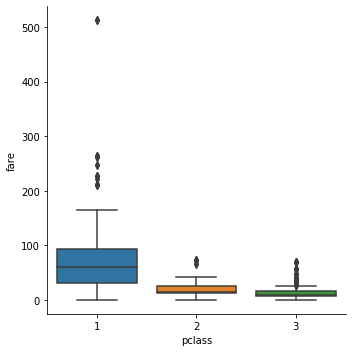

In [14]:
sns.catplot(x='pclass',y='fare',data=titanic, kind ='box')

In [15]:
titanic[titanic['pclass']==1]['age'].mean()

38.233440860215055

In [16]:
titanic[titanic['pclass']==2]['age'].mean()

29.87763005780347

In [17]:
titanic[titanic['pclass']==3]['age'].mean()

25.14061971830986

In [18]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return titanic[titanic['pclass']==1]['age'].mean()
        elif pclass == 2:
            return titanic[titanic['pclass']==2]['age'].mean()
        elif pclass == 3:
            return titanic[titanic['pclass']==3]['age'].mean()
    else:
        return age
    
    
    

In [19]:
titanic['age']=titanic[['age','pclass']].apply(impute_age,axis=1)

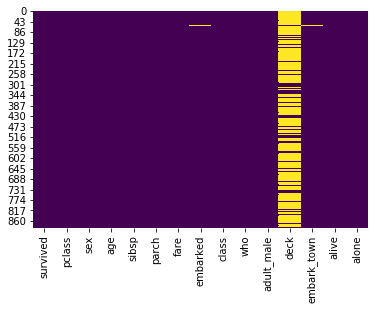

In [20]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [21]:
### Analysing Embarked

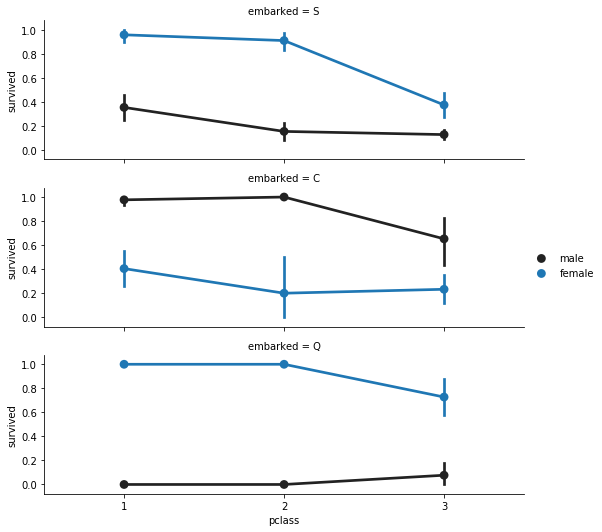

In [22]:
f=sns.FacetGrid(titanic,row='embarked',height=2.5,aspect=3)
f.map(sns.pointplot,'pclass','survived','sex',order=None,hue_order=None)
f.add_legend()

In [23]:
titanic['embarked'].isnull().sum()

2

In [24]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [25]:
common_value='S'
titanic['embarked'].fillna(common_value,inplace=True)

In [26]:
titanic['embarked'].isnull().sum()

0

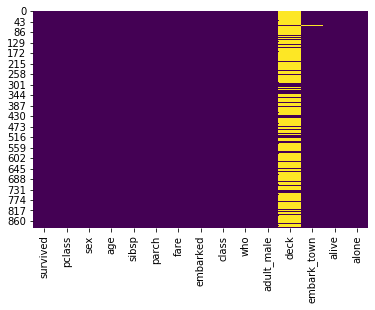

In [27]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [28]:
titanic.drop(labels=['deck','embark_town','alive'],inplace=True,axis=1)

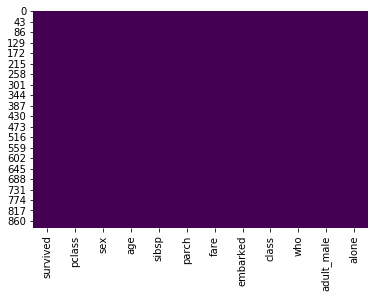

In [29]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [30]:
titanic['fare']=titanic['fare'].astype('int')
titanic['age']=titanic['age'].astype('int')
titanic['pclass']=titanic['pclass'].astype('int')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
survived      891 non-null int64
pclass        891 non-null int32
sex           891 non-null object
age           891 non-null int32
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null int32
embarked      891 non-null object
class         891 non-null category
who           891 non-null object
adult_male    891 non-null bool
alone         891 non-null bool
dtypes: bool(2), category(1), int32(3), int64(3), object(3)
memory usage: 55.0+ KB


In [31]:
## convert categorical data into numerical data

In [32]:
genders={'male':0,'female':1}
titanic['sex']=titanic['sex'].map(genders)
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,S,Third,man,True,False
1,1,1,1,38,1,0,71,C,First,woman,False,False
2,1,3,1,26,0,0,7,S,Third,woman,False,True
3,1,1,1,35,1,0,53,S,First,woman,False,False
4,0,3,0,35,0,0,8,S,Third,man,True,True


In [33]:
who={'man':0,'women':1,'child':2}
titanic['who']=titanic['who'].map(who)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,S,Third,0.0,True,False
1,1,1,1,38,1,0,71,C,First,NaN,False,False
2,1,3,1,26,0,0,7,S,Third,NaN,False,True
3,1,1,1,35,1,0,53,S,First,NaN,False,False
4,0,3,0,35,0,0,8,S,Third,0.0,True,True


In [34]:
adult_male={True:1,False:0}
titanic['adult_male']=titanic['adult_male'].map(adult_male)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,S,Third,0.0,1,False
1,1,1,1,38,1,0,71,C,First,NaN,0,False
2,1,3,1,26,0,0,7,S,Third,NaN,0,True
3,1,1,1,35,1,0,53,S,First,NaN,0,False
4,0,3,0,35,0,0,8,S,Third,0.0,1,True


In [35]:
alone={True:1,False:0} #True and False no"
titanic['alone']=titanic['alone'].map(alone)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,S,Third,0.0,1,0
1,1,1,1,38,1,0,71,C,First,NaN,0,0
2,1,3,1,26,0,0,7,S,Third,NaN,0,1
3,1,1,1,35,1,0,53,S,First,NaN,0,0
4,0,3,0,35,0,0,8,S,Third,0.0,1,1


In [36]:
ports={'S':0,'C':1,'Q':2}
titanic['embarked']=titanic['embarked'].map(ports)


In [37]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,0,Third,0.0,1,0
1,1,1,1,38,1,0,71,1,First,NaN,0,0
2,1,3,1,26,0,0,7,0,Third,NaN,0,1
3,1,1,1,35,1,0,53,0,First,NaN,0,0
4,0,3,0,35,0,0,8,0,Third,0.0,1,1


In [38]:
titanic.drop(labels=['class','who'],axis=1,inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1


In [39]:
## Build Logistic regression MOdel

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
x=titanic.drop('survived', axis=1)
y=titanic['survived']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=42)

In [44]:
X_train.shape

(596, 9)

In [45]:
model=LogisticRegression(solver='lbfgs',max_iter=200)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [46]:
model.score(X_test,y_test)

0.8271186440677966